(800, 800)


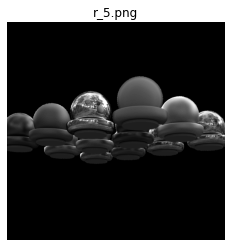

In [135]:
import cv2
import matplotlib.pyplot as plt
import os

num = 5
filename_template = "r_{}.png"
image_path = os.path.join("./material_balls/train", filename_template.format(num) )
image = cv2.imread(image_path, 0)
print(image.shape)
def show_image(im, title, cmap="brg"):
    fig, ax = plt.subplots()
    ax.imshow(im, cmap=cmap)
    ax.set_title(title)
    plt.axis("off")
    plt.show()

show_image(image, filename_template.format(num), cmap="gray")






## We're playing around with definitions of importance: First we are going to do a really simple thing where we threshold by intensity and then use these masks to define a probality distribution over the image in question. 

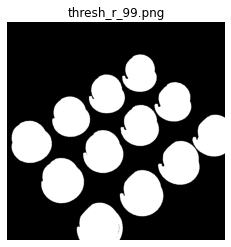

0.0


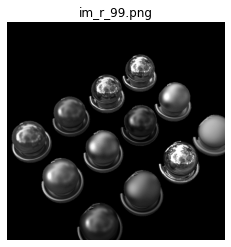

In [136]:
import numpy as np

im_number = 99
filename_template = "r_{}.png"
filename = filename_template.format(im_number)
image_path = os.path.join("./material_balls/train", filename )
im = cv2.imread(image_path, 0)

thresh_val, thresholded_im = cv2.threshold(im, 0, 255, cv2.THRESH_BINARY) 
#ret1, thresholded_im = cv2.threshold(im ,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
show_image(thresholded_im, "thresh_" + filename, cmap="gray")

print(thresh_val)

show_image(im, "im_" + filename, cmap="gray")



## Lets define a probabilty distribution using this mask, the white pixels belong to a set $ A $ and black pixels belong to a set $B$

We want to sample $K$ rays from the binary mask, we want to focus more on the foreground rays and less on the background rays by adding a prior distribution to them. 

without loss of generality we can access each pixel in the masked foreground by assigning them an indentifer from $0 \rightarrow f$ Thus we can define a discrete uniform distribution $Unif(0, f)$ to sample from without replacement. 
 

In [216]:
foreground_set = np.where( thresholded_im == 255)
background_set = np.where( thresholded_im == 0)
assert( len(foreground_set[0]) == len(foreground_set[1]))
print(len(foreground_set[0]))
print(len(background_set[0]))


200489
439511


In [217]:
import random

def sample_from_set(pixel_set, replacement=False):
    len_set = len(foreground_set[0])
    assert(len_set >= 1)
    index = np.random.random_integers(0, len_set)
    sample_x = pixel_set[0][index]
    sample_y = pixel_set[1][index]
    new_set_x = []
    new_set_y = []

    if not replacement:
        new_set_x = np.delete(pixel_set[0], index)
        new_set_y = np.delete(pixel_set[1], index)
    
    return ((new_set_x, new_set_y),(sample_x, sample_y))

def sample_ray(background_set, foreground_set, alpha):
    assert( 0 <= alpha <= 1 )
    set_names = ["background", "foreground"]
    sets = [background_set, foreground_set]
    chosen_set_i = random.choices([0, 1], weights=[1 - alpha, alpha], k=1)[0]
    #print(f"choosing: {set_names[chosen_set_i]}")
    chosen_set = sets[chosen_set_i]

    if len(chosen_set[0]) == 0 and len(sets[(chosen_set_i + 1) % 2]) != 0:
        print("set is empty, pulling from the other one")
        chosen_set = sets[(chosen_set_i + 1) % 2]
    elif len(chosen_set[0]) == 0 and len(sets[(chosen_set_i + 1) % 2]) == 0:
        #print("here")
        # both are empty. 
        return (background_set, foreground_set, None) 

    new_set, sample = sample_from_set(chosen_set)
    if chosen_set_i == 0:
        print(len(new_set[0]))
        background_set = new_set
    else:
        foreground_set = new_set

    return (background_set, foreground_set, sample)


In [215]:
background_set, foreground_set, sample = sample_ray(background_set, foreground_set, 0)
print(sample)

choosing: background
439510
(180, 737)


In [219]:
samples = []
for i in range(200):
    background_set, foreground_set, sample = sample_ray(background_set, foreground_set, 0)
    samples.append(sample)

choosing: background
439510
choosing: background
439509
choosing: background
439508
choosing: background
439507
choosing: background
439506
choosing: background
439505
choosing: background
439504
choosing: background
439503
choosing: background
439502
choosing: background
439501
choosing: background
439500
choosing: background
439499
choosing: background
439498
choosing: background
439497
choosing: background
439496
choosing: background
439495
choosing: background
439494
choosing: background
439493
choosing: background
439492
choosing: background
439491
choosing: background
439490
choosing: background
439489
choosing: background
439488
choosing: background
439487
choosing: background
439486
choosing: background
439485
choosing: background
439484
choosing: background
439483
choosing: background
439482
choosing: background
439481
choosing: background
439480
choosing: background
439479
choosing: background
439478
choosing: background
439477
choosing: background
439476
choosing: background

In [220]:
print(len(foreground_set[0]))
print(len(background_set[0]))
print(len(foreground_set[0]) + len(background_set[0]))

200489
439311
639800


In [210]:
len(s)

160000